## Importing the Libraries

In [436]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn import preprocessing

import statsmodels.api as sm
import statsmodels.formula.api as smf


## Importing the Datasets

In [437]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## Splitting as Training and Testing Data 

In [438]:
train.head()

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
0,1.0,27.0,1.0,1.0,1.0,A,18.0,3.0,1.0,28.0,...,1.0,0.0,0.0,0.0,0.0,1.0,Mp,NPT,1.0,-1
1,2.0,30.0,0.0,1.0,1.0,B,18.0,13.0,3.0,19.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Mm,NST,1.0,-1
2,3.0,37.0,0.0,1.0,1.0,A,1.0,3.0,14.0,33.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Mp,NPT,0.0,1
3,4.0,29.0,0.0,1.0,1.0,C,14.0,9.0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Mp,NST,0.0,-1
4,5.0,33.0,1.0,1.0,0.0,E,2.0,15.0,12.0,39.0,...,1.0,0.0,0.0,0.0,0.0,0.0,Mm,NST,1.0,-1


In [439]:
xtrain= train.iloc[:,:-1]
#xtrain= pd.DataFrame(xtrain)

In [440]:
xtrain.shape


(2501, 67)

In [441]:
ytrain= train.iloc[:,-1]
#ytrain= pd.DataFrame(ytrain)
ytrain.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: y, dtype: int64

In [442]:
#Class Imbalance
ytrain.value_counts()

-1       1891
 1        609
-1282       1
Name: y, dtype: int64

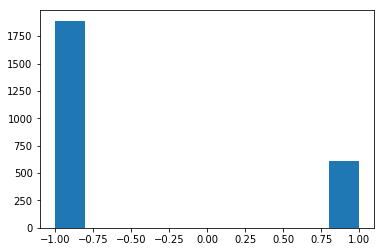

In [463]:
#Visualizing the Class Imbalanace

import matplotlib.pyplot as plt
plt.hist(ytrain)
plt.show()

In [443]:
train[train["y"] <-2]

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1282


In [444]:
train=train.drop([2500])

In [445]:
train.shape

(2500, 68)

In [446]:
xtrain= train.iloc[:,:-1]

ytrain= train.iloc[:,-1]

In [447]:
#Class Imbalance
ytrain.value_counts()

-1    1891
 1     609
Name: y, dtype: int64

In [448]:
test.head()

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
0,1,30,1,1,0,A,16,5,2,28,...,1,0,0,0,0,1,Mp,NPT,1,NaN
1,2,41,0,1,1,C,8,3,9,34,...,1,0,0,0,0,0,Ma,PT,1,NaN
2,3,24,0,1,0,E,5,1,6,27,...,0,0,0,0,0,1,Mp,ST,1,NaN
3,4,36,1,1,0,A,17,11,8,35,...,1,0,0,0,0,0,Mp,NPT,1,NaN
4,5,19,0,1,1,C,1,0,14,27,...,1,0,0,0,0,1,Ma,PT,1,NaN


In [449]:
xtest=test.iloc[:,:-1]
#xtest=pd.DataFrame(xtest)
xtest.head()

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
0,1,30,1,1,0,A,16,5,2,28,...,0,1,0,0,0,0,1,Mp,NPT,1
1,2,41,0,1,1,C,8,3,9,34,...,0,1,0,0,0,0,0,Ma,PT,1
2,3,24,0,1,0,E,5,1,6,27,...,0,0,0,0,0,0,1,Mp,ST,1
3,4,36,1,1,0,A,17,11,8,35,...,0,1,0,0,0,0,0,Mp,NPT,1
4,5,19,0,1,1,C,1,0,14,27,...,0,1,0,0,0,0,1,Ma,PT,1


In [450]:
xtrain.head()

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
0,1.0,27.0,1.0,1.0,1.0,A,18.0,3.0,1.0,28.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Mp,NPT,1.0
1,2.0,30.0,0.0,1.0,1.0,B,18.0,13.0,3.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mm,NST,1.0
2,3.0,37.0,0.0,1.0,1.0,A,1.0,3.0,14.0,33.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mp,NPT,0.0
3,4.0,29.0,0.0,1.0,1.0,C,14.0,9.0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mp,NST,0.0
4,5.0,33.0,1.0,1.0,0.0,E,2.0,15.0,12.0,39.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Mm,NST,1.0


## Encoding the Categorical Varaibles 

In [451]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
xtrain['x5'] = labelencoder_X.fit_transform(xtrain['x5'])
xtrain['x13'] = labelencoder_X.fit_transform(xtrain['x13'])
xtrain['x64'] = labelencoder_X.fit_transform(xtrain['x64'])
xtrain['x65'] = labelencoder_X.fit_transform(xtrain['x65'])
#xtrain.values[:, 13] = labelencoder_X.fit_transform(xtrain.values[:, 13])
#xtrain.values[:, 64] = labelencoder_X.fit_transform(xtrain.values[:, 64])
#xtrain.values[:, 65] = labelencoder_X.fit_transform(xtrain.values[:, 65])

In [452]:
#xtrain= xtrain= pd.get_dummies(xtrain)
xtrain.head()

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
0,1.0,27.0,1.0,1.0,1.0,0,18.0,3.0,1.0,28.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3,0,1.0
1,2.0,30.0,0.0,1.0,1.0,1,18.0,13.0,3.0,19.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,1,1.0
2,3.0,37.0,0.0,1.0,1.0,0,1.0,3.0,14.0,33.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,0,0.0
3,4.0,29.0,0.0,1.0,1.0,2,14.0,9.0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0.0
4,5.0,33.0,1.0,1.0,0.0,4,2.0,15.0,12.0,39.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,1,1.0


In [453]:
xtest['x5'] = labelencoder_X.fit_transform(xtest['x5'])
xtest['x13'] = labelencoder_X.fit_transform(xtest['x13'])
xtest['x64'] = labelencoder_X.fit_transform(xtest['x64'])
xtest['x65'] = labelencoder_X.fit_transform(xtest['x65'])


In [454]:
#xtest= xtest= pd.get_dummies(xtest)
xtest.head()

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66
0,1,30,1,1,0,0,16,5,2,28,...,0,1,0,0,0,0,1,1,0,1
1,2,41,0,1,1,1,8,3,9,34,...,0,1,0,0,0,0,0,0,1,1
2,3,24,0,1,0,2,5,1,6,27,...,0,0,0,0,0,0,1,1,2,1
3,4,36,1,1,0,0,17,11,8,35,...,0,1,0,0,0,0,0,1,0,1
4,5,19,0,1,1,1,1,0,14,27,...,0,1,0,0,0,0,1,0,1,1


## Taking care of Missing Data 

In [455]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(xtrain)
xtrain = imputer.transform(xtrain)


In [456]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(xtest)
xtest = imputer.transform(xtest)


## Scaling the Data

In [457]:
from sklearn.preprocessing import StandardScaler

# Scalar Transformation for x values              
scaler = StandardScaler()
scaler.fit(xtrain)
xstd = scaler.transform(xtrain)


## Splitting the Existing Train Data Into Training and Testing 

In [458]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.2, random_state = 0)


## Running a Decision Tree Classifier with Default Settings


In [459]:
#Modelling using the Default parameters

from sklearn.tree import DecisionTreeClassifier
modelnow=DecisionTreeClassifier(random_state=0)
modelnow.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [460]:
# Predicting a new result
y_pred = modelnow.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[314  62]
 [ 47  77]]


In [461]:
#Accuracy of the Model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.782

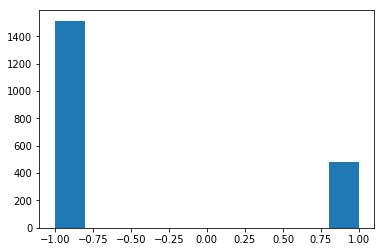

In [462]:
#Visualizing the Class Imbalanace

import matplotlib.pyplot as plt
plt.hist(y_train)
plt.show()

Since there is a class imbalnce in the data, the data is resampled to create equal instances of -1 and +1. Here upsampling method is preferred over the downsampling because the downsampling method results in some loss of data.

In [464]:
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [465]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

C:\Users\shari\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


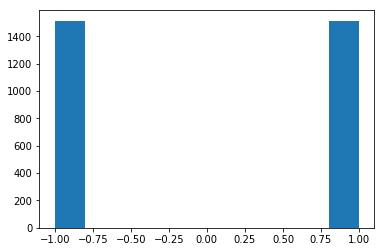

In [466]:

import matplotlib.pyplot as plt
plt.hist(y_train_res)
plt.show()

In [467]:
modelnow=DecisionTreeClassifier(random_state=0)
modelnow.fit(x_train_res,y_train_res)
modelnow.score(x_test,y_test)


0.788

An important point to note is that here after upsampling the Training Data, we get an improved accuracy of 80.2% from 79.4%. This Upsampled Training Data will be used further for the predictions.  

# Random Forest Classifier 

## With Default Parameters 

In [468]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(x_train_res,y_train_res)
classifier.score(x_test,y_test)


0.804

## Random Forest with Optimal Parameters 

In [469]:
param_grid_forest = {"max_depth": np.arange(1, 5),
              "max_features": range(10, 70, 3),
              "min_samples_split": range(80, 110, 2),
              "min_samples_leaf": [1, 3, 10],
              
              "criterion": ["gini", "entropy"],
                "max_leaf_nodes": range(2, 10, 2)}


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_forest =  RandomForestClassifier(random_state=42)

gsearch_forest =  RandomizedSearchCV(estimator = random_forest,
                                                param_distributions = param_grid_forest,
                                                 cv = 10, 
                                                random_state=0)


In [470]:
gsearch_forest= gsearch_forest.fit(x_train_res, y_train_res)
score = gsearch_forest.score(x_test, y_test)    
print('Accuracy:{}, Best Parameters:{}'.format(score,gsearch_forest.best_params_))
print(gsearch_forest.best_params_)

Accuracy:0.812, Best Parameters:{'min_samples_split': 90, 'min_samples_leaf': 10, 'max_leaf_nodes': 6, 'max_features': 52, 'max_depth': 3, 'criterion': 'gini'}
{'min_samples_split': 90, 'min_samples_leaf': 10, 'max_leaf_nodes': 6, 'max_features': 52, 'max_depth': 3, 'criterion': 'gini'}


In [471]:
print ("The Training Accuracy is",np.round(gsearch_forest.score(x_train_res, y_train_res)*100,2),"%")
print ("The Test Accuracy is",np.round(gsearch_forest.score(x_test,y_test)*100,2),"%")


The Training Accuracy is 85.58 %
The Test Accuracy is 81.2 %


## Choosing the Parameters based on Accuracies 

## Minimum Sample Leaf 

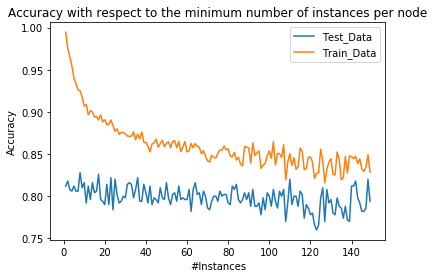

In [141]:
# Min Samples Leaf

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(1,150):
   
    classification_model = RandomForestClassifier(min_samples_leaf=i)   
    classification_model.fit(x_train_res, y_train_res)
    predicted_train = classification_model.predict(x_train_res)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train_res, y_train_res))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(1,150),accuracy_test,label='Test_Data')
ax0.plot(range(1,150),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Minimum Sample Split 

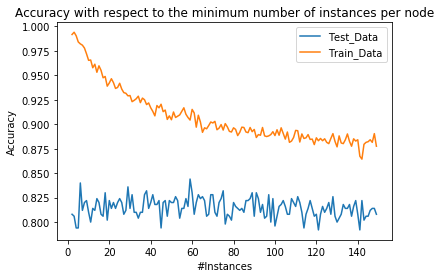

In [144]:
# Min Samples Split

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(2,150):
   
    classification_model = RandomForestClassifier(min_samples_split=i)   
    classification_model.fit(x_train_res, y_train_res)
    predicted_train = classification_model.predict(x_train_res)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train_res, y_train_res))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(2,150),accuracy_test,label='Test_Data')
ax0.plot(range(2,150),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Max Features 

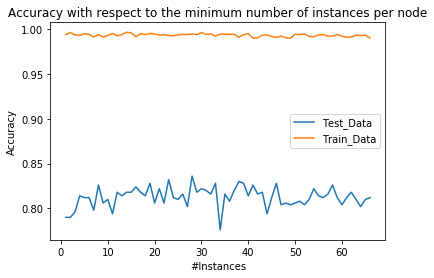

In [147]:
# Max Features

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(1,67):
   
    classification_model = RandomForestClassifier(max_features=i)   
    classification_model.fit(x_train_res, y_train_res)
    predicted_train = classification_model.predict(x_train_res)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train_res, y_train_res))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(1,67),accuracy_test,label='Test_Data')
ax0.plot(range(1,67),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Maximum Leaf Nodes 

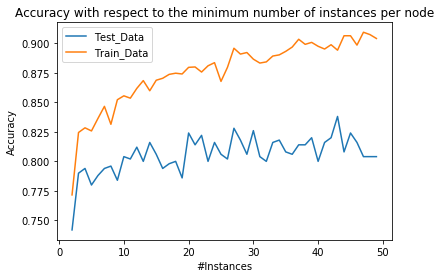

In [148]:
# Max Leaf Nodes

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(2,50):
   
    classification_model = RandomForestClassifier(max_leaf_nodes=i)   
    classification_model.fit(x_train_res, y_train_res)
    predicted_train = classification_model.predict(x_train_res)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train_res, y_train_res))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(2,50),accuracy_test,label='Test_Data')
ax0.plot(range(2,50),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Maximum Depth 

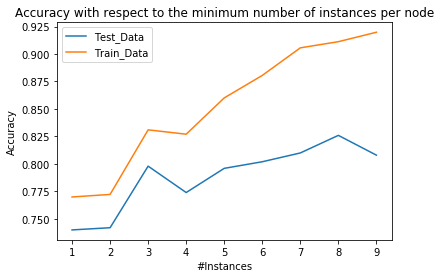

In [149]:
# Max Depth

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(1,10):
   
    classification_model = RandomForestClassifier(max_depth=i)   
    classification_model.fit(x_train_res, y_train_res)
    predicted_train = classification_model.predict(x_train_res)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train_res, y_train_res))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(1,10),accuracy_test,label='Test_Data')
ax0.plot(range(1,10),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Using the Optimal Parameters obtained from the Graphs 

In [472]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_forest =  RandomForestClassifier(random_state=0, bootstrap=True, max_depth=8, max_features=21, max_leaf_nodes=43,
                                        min_samples_leaf=3 ,min_samples_split=100, criterion='gini', class_weight= "balanced",
                                       oob_score = True)

random_forest= random_forest.fit(x_train_res, y_train_res)
print(random_forest.score(x_test, y_test)) 
print(random_forest.oob_score_)


0.83
0.8524752475247525


C:\Users\shari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\shari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [473]:
print ("The Training Accuracy is",np.round(random_forest.score(x_train_res, y_train_res)*100,2),"%")
print ("The Test Accuracy is",np.round(random_forest.score(x_test,y_test)*100,2),"%")
print ("Out of Bag Score is",np.round(random_forest.oob_score_*100,2),"%")


The Training Accuracy is 87.52 %
The Test Accuracy is 83.0 %
Out of Bag Score is 85.25 %


## Prediction of Test Results 

In [474]:
y_pred = random_forest.predict(x_test)

## Confusion Matrix 

In [475]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[324  52]
 [ 33  91]]


## Balanced Error Rate 

## ROC Curve 

0.797786547700755


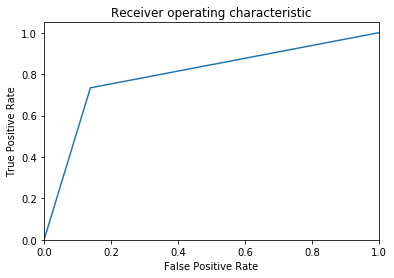

In [476]:


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc_score(y_test, y_pred))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## Fitting for the Entire Model 

In [477]:
random_forest= random_forest.fit(xtrain, ytrain)
print ("The Training Accuracy is",np.round(random_forest.score(x_train_res, y_train_res)*100,2),"%")


The Training Accuracy is 82.34 %


C:\Users\shari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\shari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


## Prediction Results

In [478]:

ypred = random_forest.predict(xtest)
ypred

array([-1,  1, -1, ..., -1, -1, -1], dtype=int64)

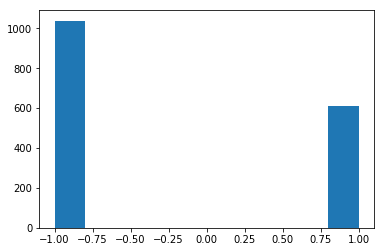

In [479]:
import matplotlib.pyplot as plt
plt.hist(ypred)
plt.show()

## Exporting the Predicted Value as a Excel Sheet 

In [480]:
y_pred=pd.DataFrame(ypred) 
y_pred.to_excel('upsample.xlsx', sheet_name='sheet1', index=False)

## Downsampling 

In [516]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [517]:
train=train.drop([2500])

In [518]:
from sklearn.utils import resample
majory= train[train['y']==-1]
minory= train[train['y']==1]
majordownsampled= resample(majory,replace=False, n_samples=609, random_state=0)
downsample= pd.concat([majordownsampled, minory])

In [484]:
downsample.shape

(1218, 68)

In [519]:
downsample.head()

,Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x58,x59,x60,x61,x62,x63,x64,x65,x66,y
1060,1061.0,26.0,0.0,1.0,1.0,A,17.0,6.0,0.0,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Mp,NPT,1.0,-1
1624,1625.0,24.0,1.0,1.0,1.0,C,13.0,18.0,13.0,32.0,...,1.0,0.0,0.0,0.0,0.0,1.0,Mm,PT,1.0,-1
867,868.0,33.0,1.0,1.0,1.0,A,9.0,9.0,12.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Mp,NPT,1.0,-1
773,774.0,30.0,0.0,1.0,1.0,E,13.0,9.0,11.0,31.0,...,1.0,0.0,0.0,0.0,0.0,1.0,Ma,NST,1.0,-1
1461,1462.0,29.0,1.0,1.0,1.0,B,10.0,18.0,14.0,30.0,...,0.0,0.0,0.0,0.0,0.0,1.0,Mp,NST,1.0,-1


In [520]:

xtrain= downsample.iloc[:,:-1]
ytrain= downsample.iloc[:,-1]

In [487]:
ytrain.head()

1060   -1
1624   -1
867    -1
773    -1
1461   -1
Name: y, dtype: int64

In [488]:

ytrain.value_counts()


 1    609
-1    609
Name: y, dtype: int64

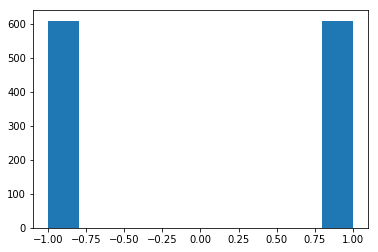

In [521]:
import matplotlib.pyplot as plt
plt.hist(ytrain)
plt.show()

In [522]:
xtest=test.iloc[:,:-1]

## Encoding the Categorical Variables 

In [523]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
xtrain['x5'] = labelencoder_X.fit_transform(xtrain['x5'])
xtrain['x13'] = labelencoder_X.fit_transform(xtrain['x13'])
xtrain['x64'] = labelencoder_X.fit_transform(xtrain['x64'])
xtrain['x65'] = labelencoder_X.fit_transform(xtrain['x65'])

In [548]:
xtest['x5'] = labelencoder_X.fit_transform(xtest['x5'])
xtest['x13'] = labelencoder_X.fit_transform(xtest['x13'])
xtest['x64'] = labelencoder_X.fit_transform(xtest['x64'])
xtest['x65'] = labelencoder_X.fit_transform(xtest['x65'])


## Missing Values 

In [524]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(xtrain)
xtrain = imputer.transform(xtrain)


In [549]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(xtest)
xtest = imputer.transform(xtest)

In [526]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.2, random_state = 0)


In [527]:
#Modelling using the Default parameters

from sklearn.tree import DecisionTreeClassifier
modelnow=DecisionTreeClassifier(random_state=0)
modelnow.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [528]:
# Predicting a new result
y_pred = modelnow.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 79  35]
 [ 29 101]]


In [529]:
#Accuracy of the Model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.7377049180327869

## Random Forest with Default parameters 

In [530]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0)
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)


0.8073770491803278

## Random Forest with Grid Search Values 

In [531]:
param_grid_forest = {"max_depth": np.arange(1, 5),
              "max_features": range(10, 70, 3),
              "min_samples_split": range(80, 110, 2),
              "min_samples_leaf": [1, 3, 10],
              
              "criterion": ["gini", "entropy"],
                "max_leaf_nodes": range(2, 10, 2)}


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_forest =  RandomForestClassifier(random_state=42)

gsearch_forest =  RandomizedSearchCV(estimator = random_forest,
                                                param_distributions = param_grid_forest,
                                                 cv = 10, 
                                                random_state=0)


In [532]:
gsearch_forest= gsearch_forest.fit(x_train, y_train)
score = gsearch_forest.score(x_test, y_test)    
print('Accuracy:{}, Best Parameters:{}'.format(score,gsearch_forest.best_params_))
print(gsearch_forest.best_params_)

Accuracy:0.8401639344262295, Best Parameters:{'min_samples_split': 106, 'min_samples_leaf': 3, 'max_leaf_nodes': 8, 'max_features': 46, 'max_depth': 4, 'criterion': 'gini'}
{'min_samples_split': 106, 'min_samples_leaf': 3, 'max_leaf_nodes': 8, 'max_features': 46, 'max_depth': 4, 'criterion': 'gini'}


In [533]:
print ("The Training Accuracy is",np.round(gsearch_forest.score(x_train, y_train)*100,2),"%")
print ("The Test Accuracy is",np.round(gsearch_forest.score(x_test,y_test)*100,2),"%")


The Training Accuracy is 78.85 %
The Test Accuracy is 84.02 %


# Generating Hyperparameter values from the Graph

## Min Sample Leaf 

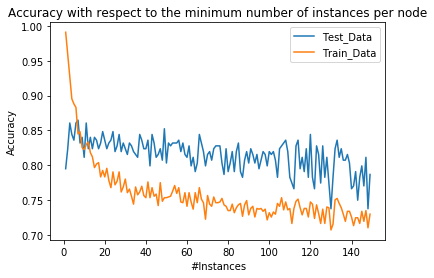

In [534]:
# Min Samples Leaf

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(1,150):
   
    classification_model = RandomForestClassifier(min_samples_leaf=i)   
    classification_model.fit(x_train, y_train)
    predicted_train = classification_model.predict(x_train)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train, y_train))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(1,150),accuracy_test,label='Test_Data')
ax0.plot(range(1,150),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Min Sample Split 

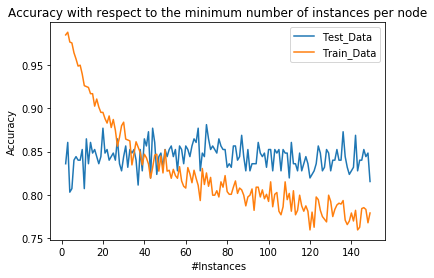

In [535]:
# Min Samples Split

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(2,150):
   
    classification_model = RandomForestClassifier(min_samples_split=i)   
    classification_model.fit(x_train, y_train)
    predicted_train = classification_model.predict(x_train)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train, y_train))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(2,150),accuracy_test,label='Test_Data')
ax0.plot(range(2,150),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Max Features 

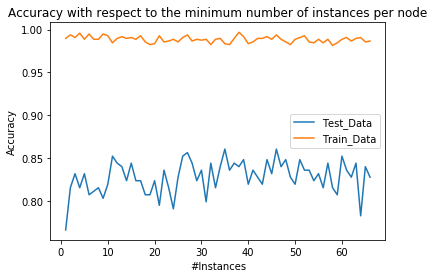

In [536]:
# Max Features

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(1,67):
   
    classification_model = RandomForestClassifier(max_features=i)   
    classification_model.fit(x_train, y_train)
    predicted_train = classification_model.predict(x_train)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train, y_train))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(1,67),accuracy_test,label='Test_Data')
ax0.plot(range(1,67),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Max Leaf Nodes 

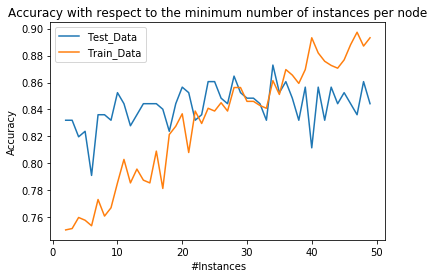

In [537]:
# Max Leaf Nodes

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(2,50):
   
    classification_model = RandomForestClassifier(max_leaf_nodes=i)   
    classification_model.fit(x_train, y_train)
    predicted_train = classification_model.predict(x_train)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train, y_train))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(2,50),accuracy_test,label='Test_Data')
ax0.plot(range(2,50),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Max Depth 

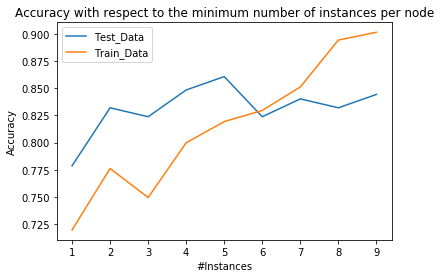

In [538]:
# Max Depth

fig = plt.figure()
ax0 = fig.add_subplot(111) 
accuracy_train = []
accuracy_test = []
for i in range(1,10):
   
    classification_model = RandomForestClassifier(max_depth=i)   
    classification_model.fit(x_train, y_train)
    predicted_train = classification_model.predict(x_train)
    predicted_test = classification_model.predict(x_test)

    accuracy_train.append(classification_model.score(x_train, y_train))
    accuracy_test.append(classification_model.score(x_test, y_test))
   
ax0.plot(range(1,10),accuracy_test,label='Test_Data')
ax0.plot(range(1,10),accuracy_train,label='Train_Data')
ax0.legend()
ax0.set_title('Accuracy with respect to the minimum number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('Accuracy')
plt.show()


## Random Forest with values obtained from Graph 

In [550]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
random_forest =  RandomForestClassifier(random_state=0, bootstrap=True, max_depth=5, max_features=28, max_leaf_nodes=35,
                                        min_samples_leaf=3 ,min_samples_split=43, criterion='gini', class_weight= "balanced",
                                       oob_score = True)

random_forest= random_forest.fit(x_train, y_train)
print(random_forest.score(x_test, y_test)) 
print(random_forest.oob_score_)


0.8565573770491803
0.7505133470225873


C:\Users\shari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\shari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [551]:
print ("The Training Accuracy is",np.round(random_forest.score(x_train, y_train)*100,2),"%")
print ("The Test Accuracy is",np.round(random_forest.score(x_test,y_test)*100,2),"%")
print ("Out of Bag Score is",np.round(random_forest.oob_score_*100,2),"%")


The Training Accuracy is 82.24 %
The Test Accuracy is 85.66 %
Out of Bag Score is 75.05 %


In [552]:
y_pred = random_forest.predict(x_test)

In [553]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 85  29]
 [  6 124]]


## Balanced Error Rate 

## ROC Curve 

0.8497300944669366


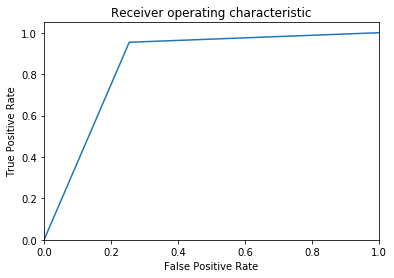

In [554]:


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

print(roc_auc_score(y_test, y_pred))
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## Fitting for Entire Model 

In [555]:
random_forest= random_forest.fit(xtrain, ytrain)
print ("The Training Accuracy is",np.round(random_forest.score(x_train, y_train)*100,2),"%")


The Training Accuracy is 80.8 %


C:\Users\shari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\shari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [556]:

ypred = random_forest.predict(xtest)
ypred

array([ 1, -1, -1, ...,  1, -1, -1], dtype=int64)

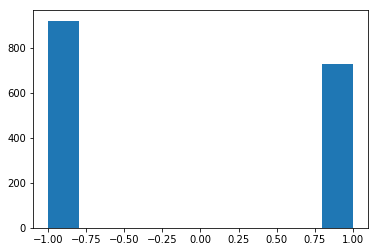

In [559]:
import matplotlib.pyplot as plt
plt.hist(ypred)
plt.show()

In [558]:
y_pred=pd.DataFrame(ypred) 
y_pred.to_excel('downsample.xlsx', sheet_name='sheet1', index=False)